Решить задачу просрочки кредита используя для прогназирования нейронные сети. Посмотреть работу с несбалансированными данными. 

In [1]:
import numpy as np
import pandas as pd
import statistics 
%matplotlib inline
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
tf.__version__

'2.10.0'

In [3]:
keras.__version__

'2.10.0'

In [4]:
df = pd.read_csv("cs-training.csv")

In [5]:
print(df.shape)
df.describe(include = "all").T

(150000, 12)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [7]:
cleaned_df = df.copy(deep = True)

# Для MonthlyIncome пропуски заменим наиболее часто встречающимся значением
cleaned_df["MonthlyIncome"].fillna(statistics.mode(cleaned_df["MonthlyIncome"]), inplace=True)

# Для NumberOfDependents пропуски заменим наиболее часто встречающимся значением
cleaned_df["NumberOfDependents"].fillna(statistics.mode(cleaned_df["NumberOfDependents"]), inplace=True)

#в столбце age заменим нулевые элементы наиболее часто встречающимся значением 
cleaned_df.loc[cleaned_df['age'] == 0, 'age'] = statistics.mode(cleaned_df["age"])

#в столбце MonthlyIncome заменим нулевые элементы средним значением 
cleaned_df.loc[cleaned_df['MonthlyIncome'] == 0, 'MonthlyIncome'] = statistics.mean(cleaned_df["MonthlyIncome"])

#в столбце RevolvingUtilizationOfUnsecuredLines заменим нулевые элементы средним значением 
cleaned_df.loc[cleaned_df['RevolvingUtilizationOfUnsecuredLines'] == 0, 'RevolvingUtilizationOfUnsecuredLines'] = statistics.mode(cleaned_df['RevolvingUtilizationOfUnsecuredLines'])

In [8]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [9]:
cleaned_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295533,14.771251,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,150000.0,6408.226970,12880.477328,1.0,4000.000000,5000.000000,7400.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [10]:
scaler = StandardScaler()
Y = cleaned_df["SeriousDlqin2yrs"]

X = cleaned_df.drop(["SeriousDlqin2yrs"], axis=1)
X = scaler.fit_transform(X)

In [11]:
#разобьем получившийся датасет на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42, train_size=0.3)

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train.shape[1:]), #входной слой
    tf.keras.layers.Dense(30, activation="relu"), #скрытый слой
    tf.keras.layers.Dense(10, activation="relu"), #плотный слой
    tf.keras.layers.Dense(1, activation="sigmoid") #вызодной слой(1 = один выход)
])
#исп-зуем sigmoid в кач-ве фун-ции активации на вых слое п.ч. бинарная класс-ция

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense (Dense)               (None, 30)                360       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 681
Trainable params: 681
Non-trainable params: 0
_________________________________________________________________


In [15]:
#исп-зуем binary_crossentropy в кач-ве фун-ции потерь, п.ч. бинарная класс-ция
model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              metrics=keras.metrics.AUC())

In [16]:
history=model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/15
352/352 [==============================] - 2s 4ms/step - loss: 0.3166 - auc: 0.5865 - val_loss: 0.2281 - val_auc: 0.6914
Epoch 2/15
352/352 [==============================] - 1s 3ms/step - loss: 0.2195 - auc: 0.7476 - val_loss: 0.2052 - val_auc: 0.7780
Epoch 3/15
352/352 [==============================] - 1s 3ms/step - loss: 0.2007 - auc: 0.8074 - val_loss: 0.1937 - val_auc: 0.8135
Epoch 4/15
352/352 [==============================] - 1s 3ms/step - loss: 0.1946 - auc: 0.8242 - val_loss: 0.1912 - val_auc: 0.8217
Epoch 5/15
352/352 [==============================] - 1s 3ms/step - loss: 0.1924 - auc: 0.8298 - val_loss: 0.1901 - val_auc: 0.8248
Epoch 6/15
352/352 [==============================] - 1s 3ms/step - loss: 0.1912 - auc: 0.8321 - val_loss: 0.1903 - val_auc: 0.8245
Epoch 7/15
352/352 [==============================] - 1s 3ms/step - loss: 0.1907 - auc: 0.8317 - val_loss: 0.1904 - val_auc: 0.8247
Epoch 8/15
352/352 [==============================] - 1s 3ms/step - loss: 0.

In [17]:
scores = model.evaluate(X_test, y_test, verbose=0)

print("AUC работы на тестовых данных: %.2f%%" % (scores[1]*100))

AUC работы на тестовых данных: 82.87%


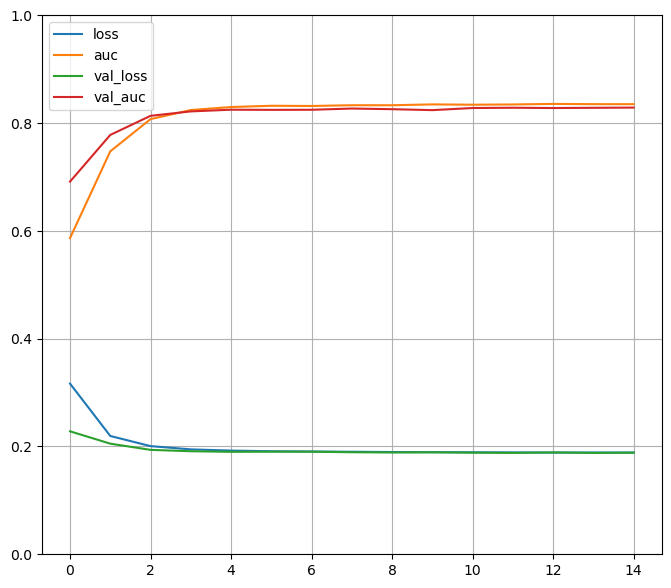

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()